# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information


# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
counter = 1
sets = 0
t0 = time.time()
error = 0
cities_temp = cities
i = 1
for city in cities_temp:
    time.sleep(1)
    city=city
    query_url = url + "&q=" + city.replace(" ", "+")
    weather_response = requests.get(query_url).json()


    try: 
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        max_temp.append(weather_response["main"]['temp_max'])
        humidity.append(weather_response["main"]['humidity'])
        lat.append(weather_response["coord"]["lat"])  
        lng.append(weather_response["coord"]["lon"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_name.append(weather_response["name"])
        print(f"processing record {i} | {city}")
        i+=1
    except:
        print(f"Data for {city} Not Found")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


processing record 1 | brae
processing record 2 | kapaa
processing record 3 | dondo
processing record 4 | rio gallegos
processing record 5 | torrington
processing record 6 | mataura
processing record 7 | gaziantep
processing record 8 | tuatapere
processing record 9 | ponta do sol
processing record 10 | nouadhibou
processing record 11 | punta arenas
processing record 12 | caconda
processing record 13 | kaliningrad
Data for yusva Not Found
processing record 14 | maloy
Data for barentsburg Not Found
processing record 15 | sao filipe
processing record 16 | tinskoy
processing record 17 | busselton
processing record 18 | longyearbyen
processing record 19 | carnarvon
processing record 20 | upernavik
processing record 21 | hofn
processing record 22 | belaya gora
processing record 23 | vaini
processing record 24 | albany
processing record 25 | rudraprayag
processing record 26 | avarua
processing record 27 | tairua
processing record 28 | bluff
processing record 29 | pauini
processing record 30 | 

processing record 225 | gimli
processing record 226 | jaciara
processing record 227 | asau
processing record 228 | yaan
Data for sodertalje Not Found
processing record 229 | khuzhir
processing record 230 | road town
processing record 231 | esperance
processing record 232 | manggar
processing record 233 | sao paulo de olivenca
processing record 234 | saldanha
processing record 235 | cerignola
processing record 236 | oktyabrskoye
processing record 237 | ust-nera
processing record 238 | souillac
Data for andevoranto Not Found
processing record 239 | solyanka
processing record 240 | copiapo
processing record 241 | verkhnevilyuysk
processing record 242 | chokurdakh
processing record 243 | tuy hoa
Data for tumannyy Not Found
processing record 244 | daugai
Data for karauzyak Not Found
processing record 245 | ilovlya
processing record 246 | geraldton
processing record 247 | hithadhoo
processing record 248 | biak
processing record 249 | kumphawapi
processing record 250 | arlit
processing record

processing record 452 | kavieng
processing record 453 | necochea
processing record 454 | ancud
processing record 455 | ca mau
processing record 456 | atar
processing record 457 | luderitz
processing record 458 | weligama
processing record 459 | tete
processing record 460 | comodoro rivadavia
processing record 461 | murray bridge
processing record 462 | saint-joseph
processing record 463 | boffa
processing record 464 | den helder
processing record 465 | nitra
processing record 466 | nangong
processing record 467 | atbasar
processing record 468 | siva
processing record 469 | kununurra
processing record 470 | denpasar
processing record 471 | platteville
Data for eldikan Not Found
processing record 472 | yumen
processing record 473 | poum
processing record 474 | rocha
processing record 475 | tadine
processing record 476 | kamina
processing record 477 | berdigestyakh
processing record 478 | gondar
processing record 479 | mancio lima
processing record 480 | assiniboia
processing record 481 |

In [5]:
cities_df = pd.DataFrame({
    "cloudiness": cloudiness,
    "country": country,
    "date": date,
    "humidity": humidity,
    "max_temp": max_temp,
    "lat": lat,
    "lng": lng,
    "wind_speed": wind_speed,
    "city_name": city_name
})
cities_df.to_csv("openweathermaps.csv",index=False)
cities_df


,cloudiness,country,date,humidity,max_temp,lat,lng,wind_speed,city_name
0,100,GB,1631720677,86,57.11,60.3964,-1.3530,10.67,Brae
1,75,US,1631720414,75,75.52,22.0752,-159.3190,16.11,Kapaa
2,0,MZ,1631720679,61,78.31,-19.6094,34.7431,8.57,Dondo
3,20,AR,1631720620,39,44.65,-51.6226,-69.2181,43.73,Río Gallegos
4,87,US,1631720682,82,81.41,41.8007,-73.1212,1.01,Torrington
...,...,...,...,...,...,...,...,...,...
542,100,MX,1631721493,65,85.33,20.8667,-90.4000,7.87,Celestún
543,100,PY,1631721495,78,64.85,-23.3428,-57.0597,6.33,Horqueta
544,77,RU,1631721497,90,43.86,65.5333,72.5167,7.96,Nadym
545,75,ES,1631721498,73,76.75,28.6585,-17.9182,6.91,Los Llanos de Aridane


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [8]:
cities_df

,cloudiness,country,date,humidity,max_temp,lat,lng,wind_speed,city_name
0,100,GB,1631720677,86,57.11,60.3964,-1.3530,10.67,Brae
1,75,US,1631720414,75,75.52,22.0752,-159.3190,16.11,Kapaa
2,0,MZ,1631720679,61,78.31,-19.6094,34.7431,8.57,Dondo
3,20,AR,1631720620,39,44.65,-51.6226,-69.2181,43.73,Río Gallegos
4,87,US,1631720682,82,81.41,41.8007,-73.1212,1.01,Torrington
...,...,...,...,...,...,...,...,...,...
542,100,MX,1631721493,65,85.33,20.8667,-90.4000,7.87,Celestún
543,100,PY,1631721495,78,64.85,-23.3428,-57.0597,6.33,Horqueta
544,77,RU,1631721497,90,43.86,65.5333,72.5167,7.96,Nadym
545,75,ES,1631721498,73,76.75,28.6585,-17.9182,6.91,Los Llanos de Aridane


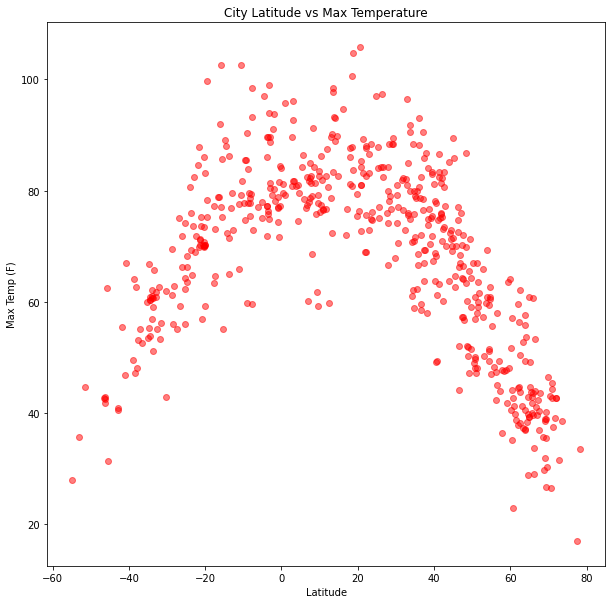

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(cities_df["lat"], cities_df["max_temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'City Latitude vs Max Temperature')
plt.savefig("LatVsTemp.png")
plt.show()

## Analysis of Plot Lat Vs. Temp
in this plot we are able to see the trends of temperature to latitude. the higher the latitude, the warmed the max temperature seems to be, and vice versa

## Latitude vs. Humidity Plot

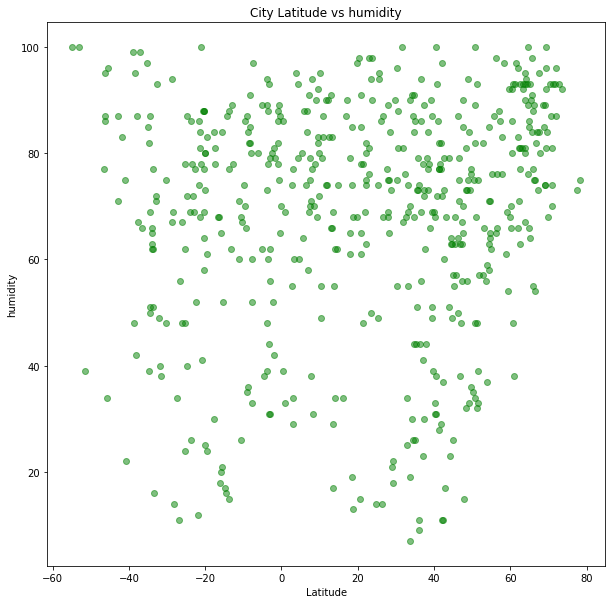

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(cities_df["lat"], cities_df["humidity"], color='g', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.title(f'City Latitude vs humidity')
plt.savefig("LatVsHum.png")
plt.show()

## Analysis of Plot Lat Vs. Humidity
in this plot we are able to see the trends of humidity to latitude. it seems as though, the humidity is in the more tropical areas of the world farther south of the equator or higher in latitude.

## Latitude vs. Cloudiness Plot

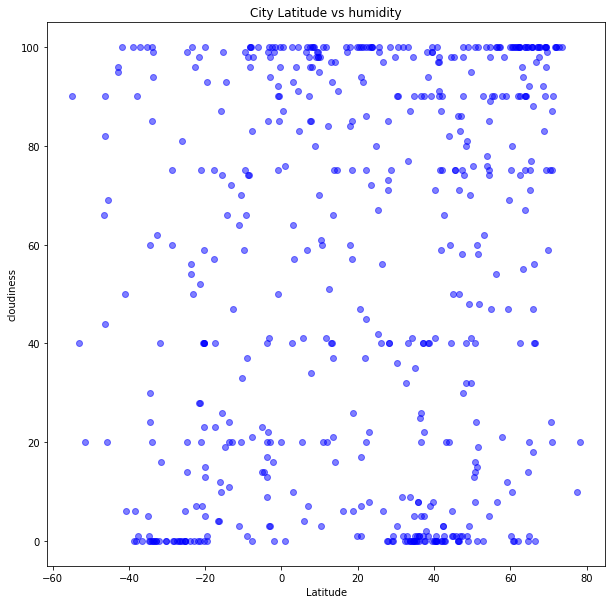

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(cities_df["lat"], cities_df["cloudiness"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title(f'City Latitude vs humidity')
plt.savefig("LatVsClou.png")
plt.show()

## Latitude vs. Wind Speed Plot

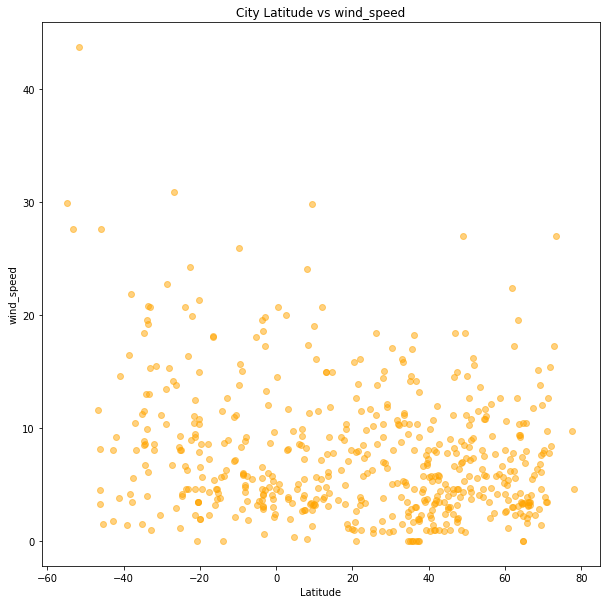

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(cities_df["lat"], cities_df["wind_speed"], color='orange', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('wind_speed')
plt.title(f'City Latitude vs wind_speed')
plt.savefig("LatVsWS.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [70]:
%matplotlib inline 
%matplotlib notebook
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [71]:
# Create a function to create Linear Regression plots for northern hemi
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     # Plot

    plt.scatter(x_values, y_values, color="b", alpha=0.5)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [72]:
# defining the northern and southern hemispheres
northern_hemi_df = cities_df.loc[(cities_df["lat"] >= 0)]
southern_hemi_df = cities_df.loc[(cities_df["lat"] < 0)]

<IPython.core.display.Javascript object>


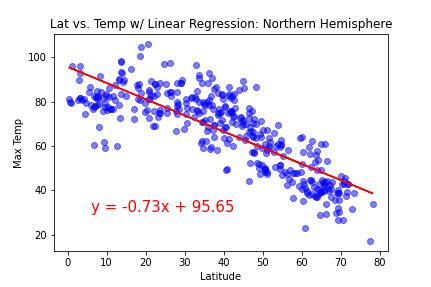

The r-value is: 0.6605659020479184


In [73]:
plt.title("Lat vs. Temp w/ Linear Regression: Northern Hemisphere")
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["max_temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [66]:
%matplotlib inline 
%matplotlib notebook
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [67]:
# Create a function to create Linear Regression plots for northern hemi
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     # Plot

    plt.scatter(x_values, y_values, color="b", alpha=0.5)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [68]:
# defining the northern and southern hemispheres
northern_hemi_df = cities_df.loc[(cities_df["lat"] >= 0)]
southern_hemi_df = cities_df.loc[(cities_df["lat"] < 0)]

<IPython.core.display.Javascript object>


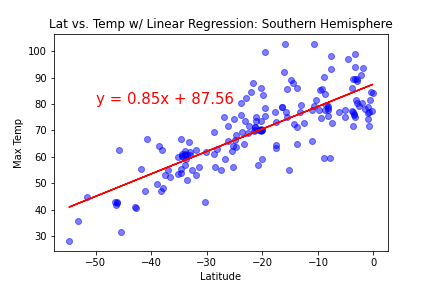

The r-value is: 0.6330586786546929


In [69]:
plt.title("Lat vs. Temp w/ Linear Regression: Southern Hemisphere")
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["max_temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-50,80))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [97]:
%matplotlib inline 
%matplotlib notebook
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [98]:
# Create a function to create Linear Regression plots for northern hemi
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     # Plot

    plt.scatter(x_values, y_values, color="b", alpha=0.5)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [99]:
# defining the northern and southern hemispheres
northern_hemi_df = cities_df.loc[(cities_df["lat"] >= 0)]
southern_hemi_df = cities_df.loc[(cities_df["lat"] < 0)]

<IPython.core.display.Javascript object>


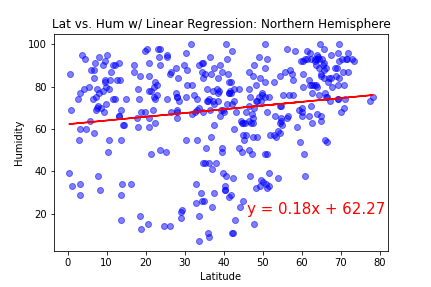

The r-value is: 0.02622847628282157


In [100]:
plt.title("Lat vs. Hum w/ Linear Regression: Northern Hemisphere")
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(46,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [74]:
%matplotlib inline 
%matplotlib notebook
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [75]:
# Create a function to create Linear Regression plots for northern hemi
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     # Plot

    plt.scatter(x_values, y_values, color="b", alpha=0.5)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [76]:
# defining the northern and southern hemispheres
northern_hemi_df = cities_df.loc[(cities_df["lat"] >= 0)]
southern_hemi_df = cities_df.loc[(cities_df["lat"] < 0)]

<IPython.core.display.Javascript object>


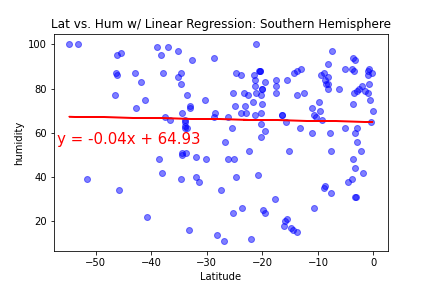

The r-value is: 0.0006550692520982428


In [77]:
plt.title("Lat vs. Hum w/ Linear Regression: Southern Hemisphere")
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, 'humidity',(-57,55))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [83]:
%matplotlib inline 
%matplotlib notebook
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [84]:
# Create a function to create Linear Regression plots for northern hemi
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     # Plot

    plt.scatter(x_values, y_values, color="b", alpha=0.5)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [85]:
# defining the northern and southern hemispheres
northern_hemi_df = cities_df.loc[(cities_df["lat"] >= 0)]
southern_hemi_df = cities_df.loc[(cities_df["lat"] < 0)]

<IPython.core.display.Javascript object>


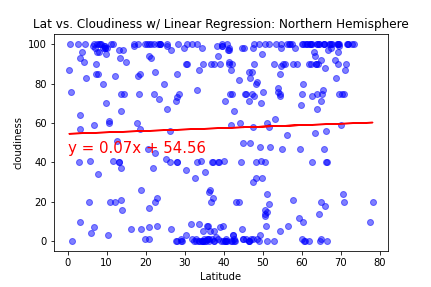

The r-value is: 0.0013985735385091576


In [88]:
plt.title("Lat vs. Cloudiness w/ Linear Regression: Northern Hemisphere")
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, 'cloudiness',(0,45))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [89]:
%matplotlib inline 
%matplotlib notebook
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [90]:
# Create a function to create Linear Regression plots for northern hemi
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     # Plot

    plt.scatter(x_values, y_values, color="b", alpha=0.5)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [91]:
# defining the northern and southern hemispheres
northern_hemi_df = cities_df.loc[(cities_df["lat"] >= 0)]
southern_hemi_df = cities_df.loc[(cities_df["lat"] < 0)]

<IPython.core.display.Javascript object>


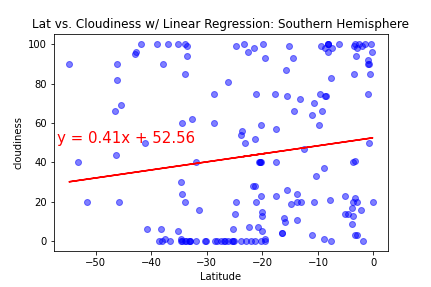

The r-value is: 0.0208527152024653


In [92]:
plt.title("Lat vs. Cloudiness w/ Linear Regression: Southern Hemisphere")
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, 'cloudiness',(-57,50))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [105]:
%matplotlib inline 
%matplotlib notebook
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [106]:
# Create a function to create Linear Regression plots for northern hemi
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     # Plot

    plt.scatter(x_values, y_values, color="b", alpha=0.5)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [107]:
# defining the northern and southern hemispheres
northern_hemi_df = cities_df.loc[(cities_df["lat"] >= 0)]
southern_hemi_df = cities_df.loc[(cities_df["lat"] < 0)]

<IPython.core.display.Javascript object>


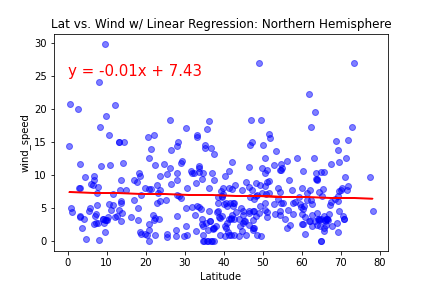

The r-value is: 0.002391568732425124


In [108]:
plt.title("Lat vs. Wind w/ Linear Regression: Northern Hemisphere")
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, 'wind_speed',(0,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [113]:
%matplotlib inline 
%matplotlib notebook
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [114]:
# Create a function to create Linear Regression plots for northern hemi
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     # Plot

    plt.scatter(x_values, y_values, color="b", alpha=0.5)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [115]:
# defining the northern and southern hemispheres
northern_hemi_df = cities_df.loc[(cities_df["lat"] >= 0)]
southern_hemi_df = cities_df.loc[(cities_df["lat"] < 0)]

<IPython.core.display.Javascript object>


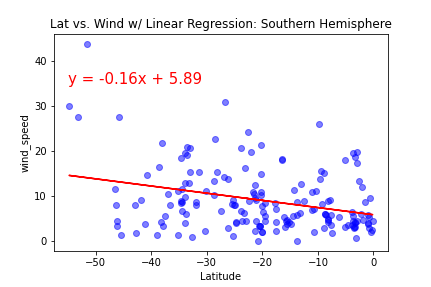

The r-value is: 0.09419972565669689


In [116]:
plt.title("Lat vs. Wind w/ Linear Regression: Southern Hemisphere")
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, 'wind_speed',(-55,35))